[nltk_data] Downloading package stopwords to /home/coco97/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.7752808988764045
Confusion Matrix:
 [[ 0  0  3  0]
 [ 0  0  9  0]
 [ 0  0 69  0]
 [ 0  0  8  0]]


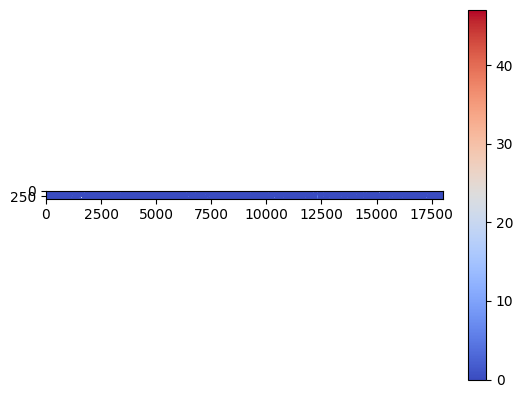

In [2]:
# Import des bibliothèques nécessaires
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk  # Bibliothèque pour le traitement du langage naturel
import numpy as np
import scipy  # Bibliothèque scientifique pour Python
import sklearn  # Bibliothèque de machine learning
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


# Téléchargez la liste de mots d'arrêt en français si ce n'est pas déjà fait
nltk.download('stopwords')


# Charger les données JSON
with open('../Data/data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convertir les données JSON en DataFrame pandas
df = pd.DataFrame(data['items'])

# Diviser les données en ensembles d'entraînement et de test
train_data, test_data= train_test_split(df, test_size=0.2, random_state=42)

# Extraire les caractéristiques
# liste de stopwords en français
french_stop_words = stopwords.words('french')
count_vectorizer = CountVectorizer(stop_words=french_stop_words)
tfidf_vectorizer = TfidfVectorizer(stop_words=french_stop_words, max_df=0.7)

X_train_count = count_vectorizer.fit_transform(train_data['content'])
X_test_count = count_vectorizer.transform(test_data['content'])

X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['content'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['content'])

# Définir les étiquettes
y_train = train_data['rating']
y_test = test_data['rating']

# Entraîner le modèle Naive Bayes
nb_classifier = MultinomialNB()

# Entraîner le modèle sur les caractéristiques TF-IDF
nb_classifier.fit(X_train_tfidf, y_train)

# Prédiction sur les données de test
y_pred = nb_classifier.predict(X_test_tfidf)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Convertir la matrice sparse en matrice dense
dense_matrix = X_train_count.toarray()

# Créer une figure et un axe
fig, ax = plt.subplots()

# Utiliser la fonction imshow pour afficher l'image de la matrice
cax = ax.imshow(dense_matrix, interpolation='nearest', cmap=plt.cm.coolwarm)

# Ajouter une barre de couleur pour indiquer l'échelle
fig.colorbar(cax)

# Afficher l'image
plt.show()